In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

####  The starting place for random variate generation is usually the generation of random numbers, which are random variates that are uniformly distributed on the interval from 0 to 1 (uniform [0, 1]).

## Uniform distribution

- Statistical meaning: Within a predefined interval, all outcomes have the same probability of occurring.

- Real-life examples: 
    - Six-sided dice: the probability of each side
    - Coin: the probability of head vs. tail
    - A deck of cards: the probability of each shape

- Graphs:
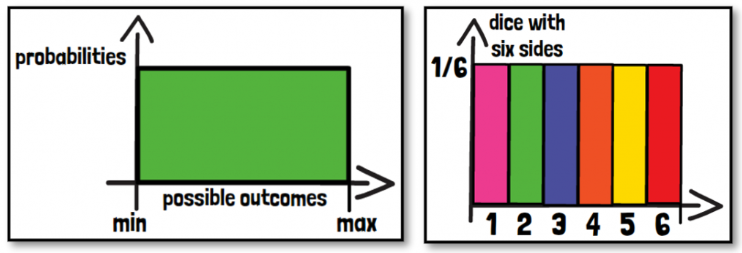

In [2]:
def generate_prn():
    return random.random()

In [3]:
# generate x uniform random variate for n equally likely outcomes

def generate_uniform_rv(n, x):
    outputs = []
    
    for i in range(x):
        intervals = np.array([j/n for j in range(1,n+1)])
        prn = generate_prn()

        first__guess = sum(prn >= intervals)
        if sum(prn == intervals) == 0: # prn is not on the boundary
            final_guess = first__guess + 1
        else: # prn is on the boundary
            final_guess = first__guess
        
        outputs.append(final_guess)
        
    return outputs

In [431]:
def draw_uniform_rv(n, x):
    rv_outputs = generate_uniform_rv(n, x)
    
    fig, ax = plt.subplots(1,2, figsize=(6, 3))
    fig.tight_layout(pad=3.0)
    
    ax[0].set_title(label='# of outcomes = '+str(n)+'; x = '+str(x))
    ax[0].set_xlabel('outomce value')
    ax[0].set_ylabel('count')
    ax[0].hist(x=rv_outputs, bins=np.arange(7)+0.5, rwidth=0.8)
    ax[0].set_xticks([1,2,3,4,5,6])
    
    ax[1].set_title(label='# of outcomes = '+str(n)+'; x = '+str(x))
    ax[1].set_xlabel('outomce value')
    ax[1].set_ylabel('probablity')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)
    ax[1].set_xticks([1,2,3,4,5,6])
    
    return rv_outputs

In [432]:
uniform_outcomes = 6

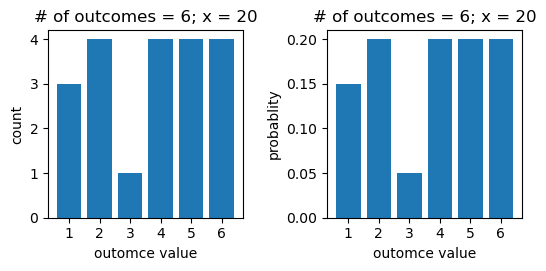

In [433]:
# small sample size
uniform_size = 20

uniform_rv_outputs = draw_uniform_rv(n=uniform_outcomes, x=uniform_size)

In [434]:
uniform_rv_outputs

[4, 5, 6, 2, 4, 1, 5, 2, 5, 4, 2, 4, 6, 1, 3, 6, 6, 1, 2, 5]

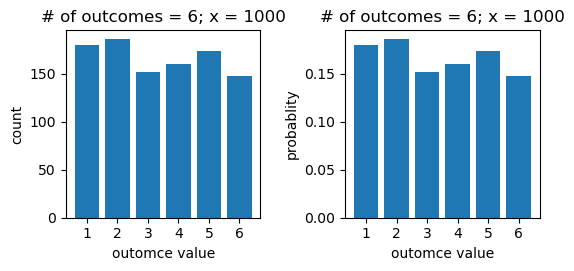

In [435]:
# big sample size
uniform_size = 1000

uniform_rv_outputs = draw_uniform_rv(n=uniform_outcomes, x=uniform_size)

In [436]:
print(uniform_rv_outputs)

[3, 4, 3, 5, 2, 2, 5, 5, 6, 5, 2, 4, 6, 2, 3, 4, 6, 6, 6, 6, 6, 5, 1, 4, 1, 6, 3, 3, 3, 1, 3, 2, 2, 2, 6, 1, 5, 1, 2, 5, 3, 1, 5, 3, 1, 1, 4, 5, 3, 6, 4, 1, 5, 6, 2, 4, 5, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1, 6, 3, 5, 5, 6, 2, 4, 5, 2, 1, 4, 3, 2, 5, 5, 4, 5, 5, 2, 3, 6, 5, 6, 6, 2, 2, 2, 2, 6, 2, 4, 5, 1, 3, 5, 6, 1, 6, 6, 6, 2, 4, 4, 2, 4, 1, 6, 4, 1, 5, 3, 3, 4, 3, 4, 2, 2, 1, 3, 4, 3, 2, 3, 6, 2, 6, 1, 3, 1, 4, 6, 1, 4, 5, 1, 5, 1, 2, 5, 1, 5, 1, 2, 5, 6, 6, 4, 4, 1, 3, 5, 1, 4, 5, 5, 2, 6, 1, 3, 6, 2, 5, 4, 4, 6, 4, 5, 6, 2, 5, 6, 4, 3, 5, 2, 4, 5, 3, 4, 4, 4, 3, 1, 2, 6, 5, 1, 6, 3, 2, 2, 4, 3, 3, 5, 2, 3, 2, 6, 3, 2, 1, 4, 1, 2, 5, 3, 4, 1, 2, 1, 1, 3, 1, 2, 6, 3, 3, 4, 1, 4, 5, 5, 5, 1, 1, 5, 5, 2, 6, 3, 4, 6, 3, 6, 2, 3, 2, 1, 4, 5, 5, 6, 6, 1, 1, 5, 3, 2, 4, 3, 5, 1, 2, 2, 2, 3, 6, 6, 1, 4, 1, 2, 5, 1, 2, 4, 4, 2, 6, 1, 6, 5, 4, 1, 5, 3, 4, 1, 1, 4, 2, 5, 4, 3, 4, 5, 1, 4, 4, 5, 1, 3, 1, 5, 4, 1, 1, 1, 5, 2, 1, 1, 3, 6, 3, 6, 6, 5, 1, 4, 5, 5, 1, 5, 2, 1, 2, 6, 4, 2, 4, 6, 6, 5, 

## Bernoulli distribution

- Statistical meaning: A discrete probability distribution that gives only two possible results in a trial (aka an experiment).

- Real-life examples: 
    - Flip a coin: the probability of head versus tail
    - Charity asks for donations: the probability of donated versus ignored

- Graphs:
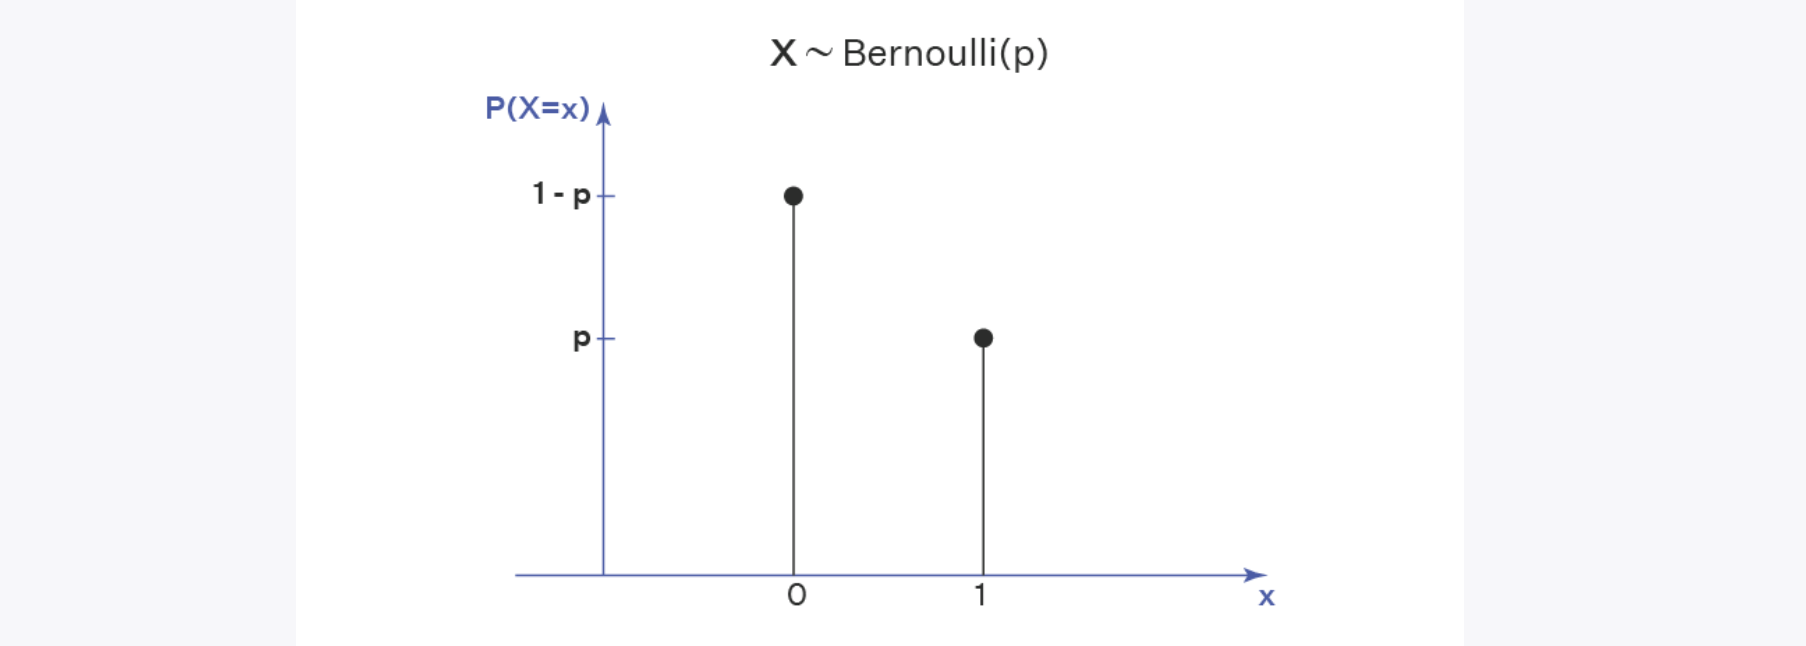

In [65]:
# generate x bernoulli random variates i.e. trials with probability p

def generate_bernoulli_rv(p, x):
    outputs = []
    prns = []
    
    for i in range(x):
        prn = generate_prn()
        prns.append(prn)
        
        if prn < 1-p:
            outputs.append(0)
        else:
            outputs.append(1)
    
    return outputs, prns

In [84]:
def draw_bernoulli_rv(p, x):
    rv_outputs, prns = generate_bernoulli_rv(p, x)
    
    x_axis = ['0', '1']
    y_axis = [rv_outputs.count(0), rv_outputs.count(1)]
    
    plt.figure(figsize=(4,3))    
    plt.title(label='p = '+str(p)+', x = '+str(x))
    plt.bar(x=x_axis, height=y_axis)
    plt.xlabel('outomce value')
    plt.ylabel('count')
    
    return rv_outputs

In [63]:
bernoulli_p = 0.2

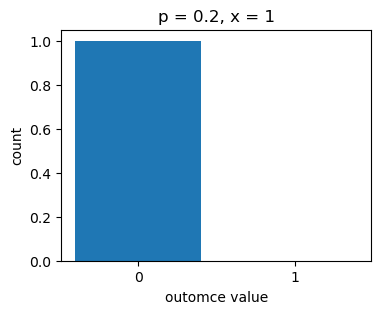

In [85]:
# small sample size
bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=1)

In [83]:
bernoulli_rv_outputs

[0]

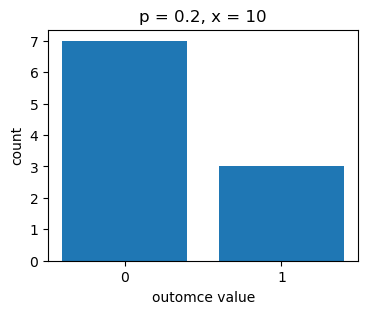

In [86]:
# small sample size
bernoulli_size = 10

bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

In [87]:
print(bernoulli_rv_outputs)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


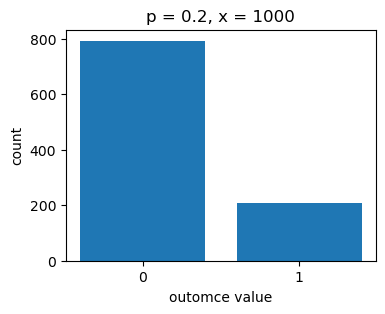

In [88]:
# big sample size
bernoulli_size = 1000

bernoulli_rv_outputs = draw_bernoulli_rv(p=bernoulli_p, x=bernoulli_size)

In [89]:
print(bernoulli_rv_outputs)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

## Binomial distribution

- Statistical meaning: For an experiment (trial) that gives only 'Success' and 'Failure' outcome, the number of ‘Success’ in a sequence of *n* experiments (aka trials).

- Real-life examples: 
    - Flip a coin: the number of heads and tails in X times (aka trial, experiments)  
    - Charity asks for donations: the number donations in a month

- Graphs:
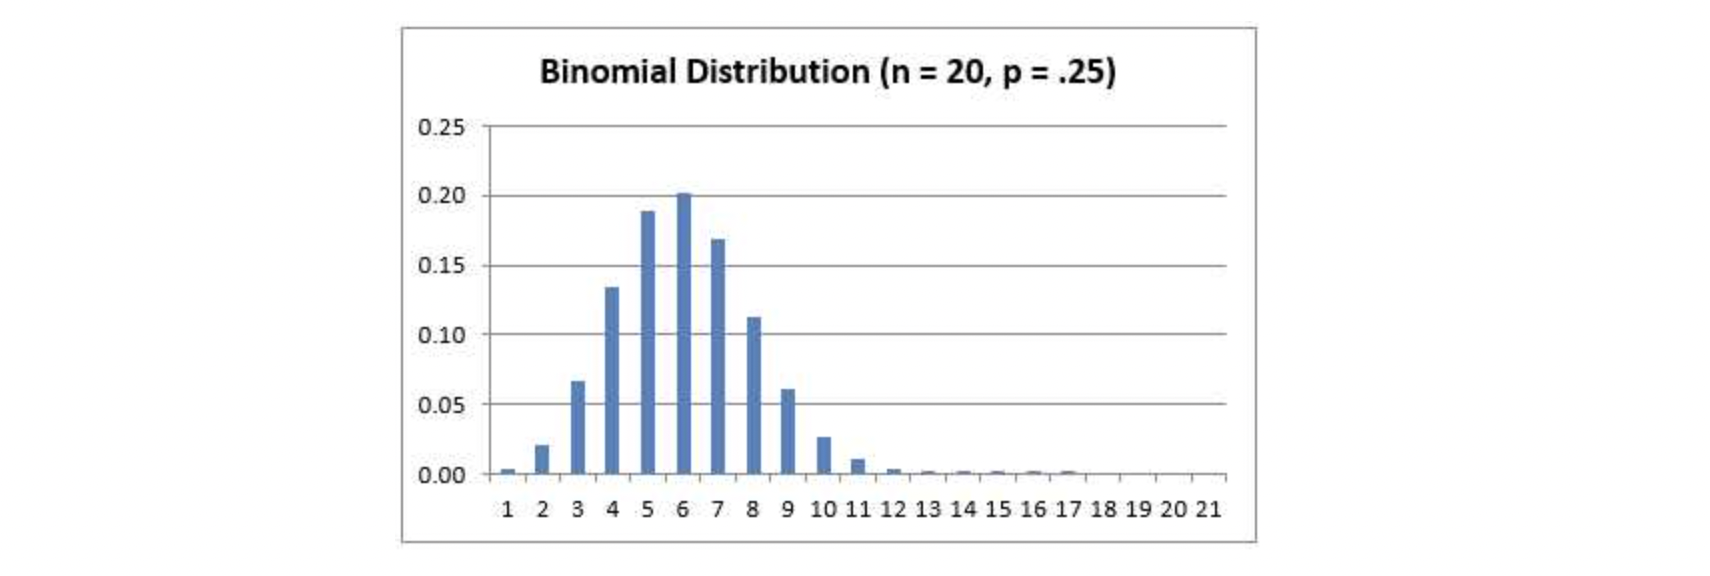

In [90]:
# generate x binomial random variates of bernoulli trials with probability p

def generate_binomial_rv(p, x):
    outputs = []
    
    for i in range(x):
        # the number of successes and failures out of Bernoulli trials
        bernoulli_output = generate_bernoulli_rv(p, x)[0] 
        # the number of successes (=1)
        outputs.append(bernoulli_output.count(1)) 
        
    return outputs

In [172]:
def draw_binomial_rv(p, x):
    rv_outputs = generate_binomial_rv(p, x)
    
    fig, ax = plt.subplots(1,2, figsize=(8, 4))
    fig.tight_layout(pad=3.0)    

    ax[0].set_title(label='Bernoulli trial prob = '+str(p)+', x = '+str(x))
    ax[0].set_ylabel('count')
    ax[0].set_xlabel('# of Success')
    min_rv = min(rv_outputs)
    bin_ct = max(rv_outputs) - min_rv + 1
    ax[0].hist(x=rv_outputs, 
               bins=np.arange(bin_ct+1)+min_rv-0.5, 
               rwidth=0.8)
    
    ax[1].set_title(label='Bernoulli trial prob = '+str(p)+', x = '+str(x))
    ax[1].set_ylabel('probablity')
    ax[1].set_xlabel('# of Success')
    values = []
    probs = []
    total_num = len(rv_outputs)
    for i in rv_outputs:
        values.append(i)
        probs.append(rv_outputs.count(i)/total_num)
    ax[1].bar(x=values, height=probs)
    
    xticks = [min(rv_outputs)+i for i in range(bin_ct)]
    if len(xticks) < 15:
        ax[0].set_xticks(xticks)    
        ax[1].set_xticks(xticks)    
    
    return rv_outputs

In [92]:
binomial_p = 0.7

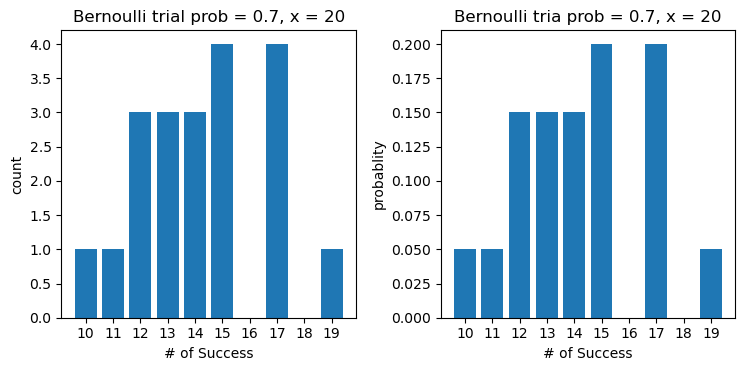

In [169]:
# small sample size
binomial_size = 20

binomial_rv_outputs = draw_binomial_rv(p=binomial_p, x=binomial_size)

In [160]:
print(binomial_rv_outputs)

[12, 16, 11, 14, 13, 13, 13, 13, 13, 16, 14, 17, 17, 11, 14, 14, 17, 14, 13, 13]


In [180]:
binomial_p = 0.46

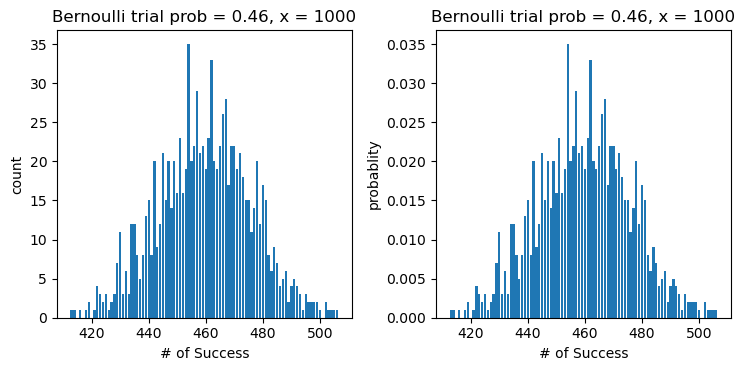

In [178]:
# big sample size
binomial_size = 1000

binomial_rv_outputs = draw_binomial_rv(p=binomial_p, x=binomial_size)

In [181]:
print(binomial_rv_outputs)

[469, 484, 432, 450, 487, 449, 461, 457, 457, 468, 457, 456, 428, 473, 484, 463, 468, 477, 437, 478, 484, 475, 466, 440, 462, 480, 445, 466, 442, 493, 457, 441, 449, 477, 493, 448, 442, 470, 465, 470, 472, 445, 448, 461, 465, 461, 451, 481, 459, 463, 448, 448, 468, 451, 488, 455, 470, 463, 454, 438, 447, 467, 443, 453, 468, 485, 453, 488, 441, 466, 459, 431, 461, 473, 446, 462, 470, 467, 467, 484, 476, 439, 468, 451, 477, 447, 447, 446, 469, 452, 496, 473, 462, 472, 436, 474, 455, 442, 478, 440, 461, 474, 439, 487, 486, 453, 461, 453, 413, 456, 462, 440, 451, 478, 467, 440, 447, 439, 444, 450, 471, 454, 422, 452, 452, 486, 471, 446, 475, 425, 449, 454, 449, 492, 440, 472, 475, 464, 461, 465, 473, 481, 453, 454, 476, 461, 480, 456, 447, 462, 470, 484, 470, 439, 478, 457, 476, 447, 464, 448, 454, 463, 447, 467, 458, 462, 459, 460, 478, 450, 434, 472, 474, 471, 469, 483, 422, 477, 472, 445, 449, 434, 456, 467, 462, 473, 481, 448, 475, 439, 447, 462, 460, 459, 457, 429, 457, 466, 447, 454,

## Geometric distribution

- Statistical meaning: The probability of having *X* Bernoulli trials with probability *p* until a Success occurs, i.e. the first success.

- Real-life examples: 
    - Job search: how many applications until receiving an offer
    - Defect products: how many items produced until the first defective unit

- Graphs:
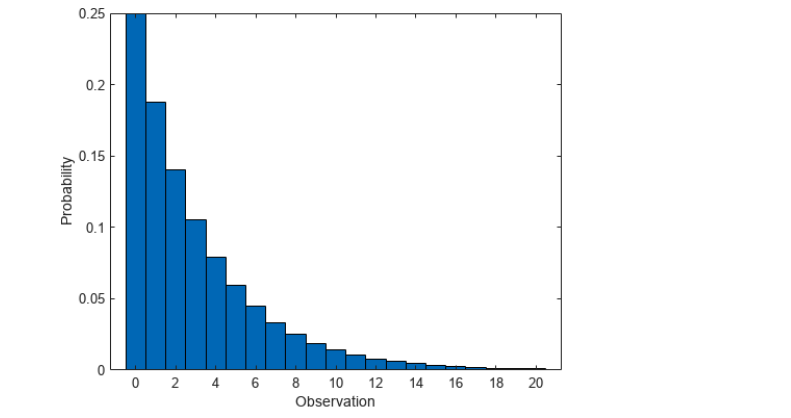

In [221]:
def geometric_pmf(p):
    outputs = []
    failure_count = 0
    
    while failure_count < 10:
        outputs.append((1-p)**failure_count*p)
        failure_count += 1
        
    return outputs, failure_count

In [222]:
def draw_geometric_distribution(p):
    rv_outputs, trial_count = geometric_pmf(p)

    plt.title(label='p = '+str(p))
    plt.ylabel('probablity')
    values = [i for i in range(trial_count)]
    plt.plot(values, rv_outputs)

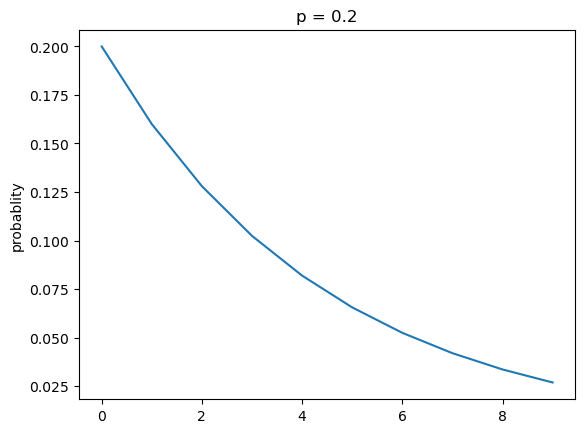

In [223]:
geometric_p = 0.2
draw_geometric_distribution(p=geometric_p)

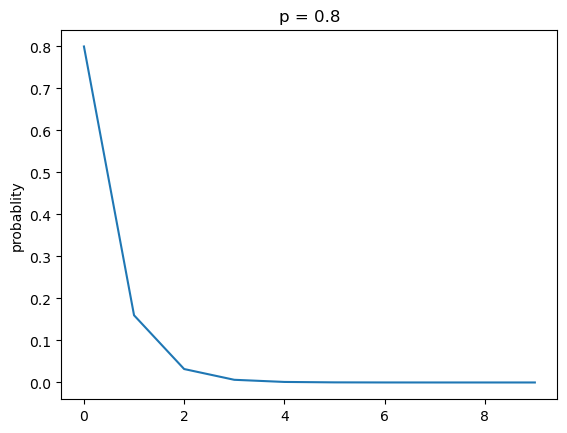

In [224]:
geometric_p = 0.8
draw_geometric_distribution(p=geometric_p)

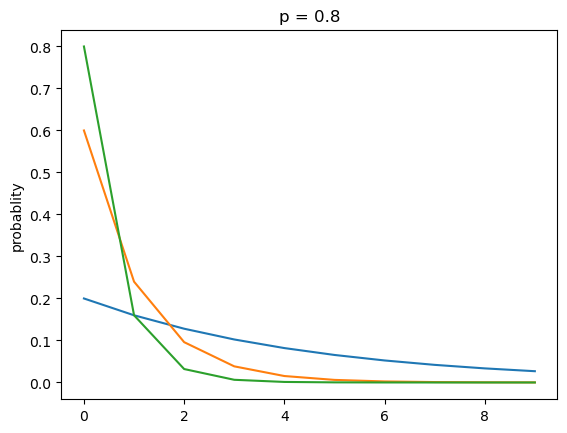

In [225]:
draw_geometric_distribution(p=0.2)
draw_geometric_distribution(p=0.6)
draw_geometric_distribution(p=0.8)

In [182]:
# generate x geometric random variate of bernoulli trials with probability p

def generate_geometric_rv(p, x):
    outputs = []
    trial_counts = []
    
    for i in range(x):
        bernoulli_outcome = 0
        trial_count = 0
        
        while bernoulli_outcome != 1: # keep going until a Success occurs
            bernoulli_outcome = generate_bernoulli_rv(p, 1)[0][0]
            trial_count += 1

        outputs.append((1-p)**(trial_count-1)*p)
        trial_counts.append(trial_count) 
        
    return outputs, trial_counts

In [204]:
def draw_geometric_rv(p, x):
    rv_outputs, trial_counts = generate_geometric_rv(p, x)

    plt.figure(figsize=(6,3))
    plt.title(label='Bernoulli trials prob = '+str(p))
    values = [i for i in trial_counts]
    plt.bar(values, rv_outputs)
    plt.xlabel('# of Bernoulli Trials until the first Success')
    plt.ylabel('Probability')
    
    return trial_counts

In [205]:
geometric_p = 0.2

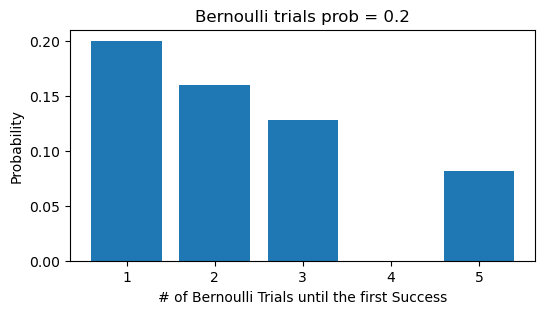

In [210]:
# small sample size
geometric_size = 10

geometric_rv_outputs = draw_geometric_rv(p=geometric_p, x=geometric_size)

In [211]:
print(geometric_rv_outputs)

[1, 1, 1, 3, 1, 2, 2, 1, 2, 5]


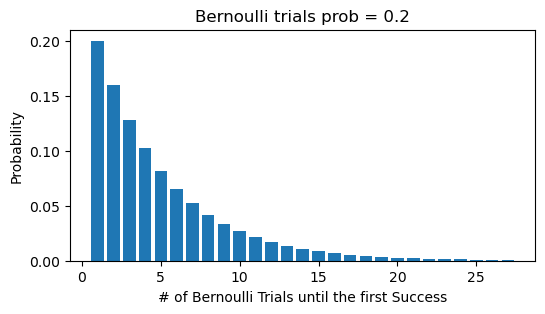

In [208]:
# big sample size
geometric_size = 1000

geometric_rv_outputs = draw_geometric_rv(p=geometric_p, x=geometric_size)

In [209]:
print(geometric_rv_outputs)

[3, 20, 1, 2, 1, 12, 3, 2, 15, 7, 3, 2, 5, 1, 1, 1, 4, 12, 14, 6, 4, 2, 1, 3, 8, 2, 5, 4, 4, 3, 1, 3, 2, 4, 5, 11, 2, 5, 2, 1, 3, 1, 4, 3, 1, 5, 1, 4, 2, 2, 6, 7, 26, 2, 3, 1, 4, 3, 9, 17, 1, 2, 2, 4, 3, 4, 5, 5, 2, 5, 10, 11, 3, 1, 6, 7, 6, 1, 13, 2, 11, 6, 2, 1, 6, 5, 2, 11, 10, 5, 12, 9, 3, 1, 2, 2, 13, 1, 3, 5, 11, 2, 3, 6, 8, 3, 2, 1, 2, 3, 1, 3, 1, 2, 2, 1, 17, 4, 3, 3, 3, 7, 2, 20, 1, 5, 7, 15, 2, 12, 1, 15, 12, 5, 6, 3, 9, 14, 3, 4, 1, 3, 8, 9, 2, 7, 5, 17, 12, 1, 1, 12, 8, 1, 7, 8, 7, 1, 3, 1, 8, 5, 4, 3, 15, 6, 1, 2, 15, 10, 8, 1, 3, 1, 1, 5, 3, 3, 1, 2, 3, 1, 1, 11, 1, 5, 1, 9, 8, 7, 1, 17, 1, 2, 8, 2, 2, 1, 3, 13, 2, 12, 1, 16, 15, 11, 3, 3, 5, 3, 1, 5, 1, 5, 5, 4, 2, 12, 5, 11, 3, 5, 10, 4, 3, 7, 3, 5, 15, 1, 5, 1, 1, 2, 7, 1, 8, 9, 1, 9, 5, 14, 5, 2, 3, 3, 1, 5, 4, 2, 10, 6, 4, 2, 1, 7, 3, 3, 2, 1, 1, 1, 3, 5, 1, 5, 6, 2, 5, 21, 1, 11, 5, 1, 10, 3, 1, 6, 1, 6, 7, 6, 4, 13, 7, 4, 10, 4, 2, 1, 13, 8, 7, 8, 9, 12, 6, 2, 4, 9, 5, 1, 10, 9, 13, 2, 2, 1, 3, 1, 2, 7, 1, 1, 5, 6,

## Poisson distribution

- Statistical meaning: The probability of an event happening *k* times within a time period.

- Real-life examples: 
    - Call Center: the probability that the call center receives more than 5 phone calls during the noon, given the average 3 calls per hour during that time period.
    - Broadcast: the probablity that the news reporter says "uh" more than three times during a broadcast, given the average 2 "uh" per broadcast.

- Graphs:
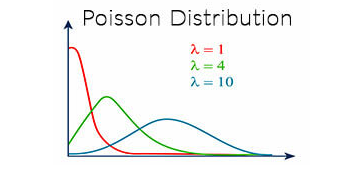

In [212]:
# generate x poisson random variate within a time period

def generate_poisson_rv(l, x):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        time_count = 0 
        cmf = 0
        while prn > cmf:
            pmf = math.e**-l*l**time_count/math.factorial(time_count)
            cmf = cmf + pmf
            time_count += 1
        outputs.append(time_count)    
        
    return outputs

In [225]:
def draw_poisson_rv(l, x):
    rv_outputs = generate_poisson_rv(l, x)
    
    plt.figure(figsize=(5,3))
    plt.title(label='lambda = '+str(l))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    
    plt.plot(values, counts)
    plt.xlabel('# of events')
    plt.ylabel('count')
    
    return rv_outputs

In [226]:
poisson_lambda = 2

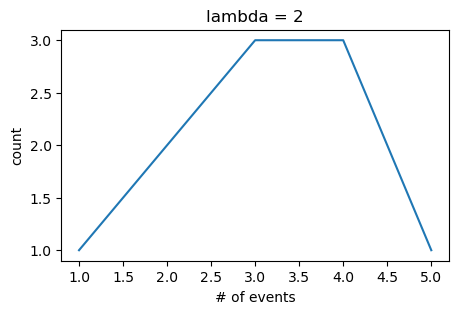

In [228]:
# small sample size
lambda_size = 10

poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=lambda_size)

In [229]:
print(poisson_rv_outputs)

[1, 2, 3, 4, 3, 4, 4, 2, 5, 3]


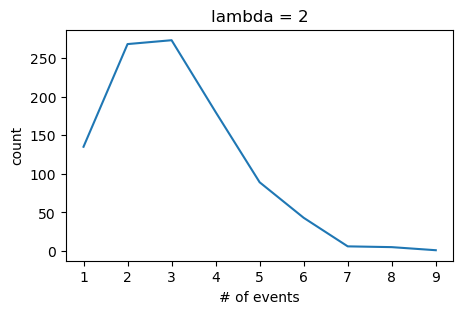

In [232]:
# big sample size
poisson_size = 1000

poisson_rv_outputs = draw_poisson_rv(l=poisson_lambda, x=poisson_size)

In [218]:
print(poisson_rv_outputs)

[3, 3, 1, 4, 1, 4, 2, 3, 2, 2, 3, 3, 4, 4, 1, 6, 2, 1, 5, 2, 4, 3, 3, 3, 5, 4, 3, 3, 1, 2, 2, 2, 2, 1, 5, 6, 4, 7, 4, 4, 1, 4, 5, 1, 2, 1, 3, 4, 3, 4, 1, 4, 4, 5, 3, 2, 3, 3, 2, 5, 3, 1, 2, 2, 1, 1, 3, 3, 4, 3, 2, 4, 2, 6, 5, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 3, 4, 5, 4, 5, 3, 3, 2, 1, 3, 4, 1, 7, 3, 2, 1, 5, 4, 2, 6, 2, 4, 2, 5, 5, 2, 3, 2, 1, 5, 3, 3, 3, 1, 4, 3, 7, 6, 2, 6, 6, 4, 2, 5, 5, 2, 3, 3, 2, 2, 4, 3, 2, 3, 4, 2, 1, 4, 3, 4, 1, 6, 3, 4, 2, 2, 4, 1, 3, 3, 3, 3, 1, 3, 5, 2, 2, 6, 3, 4, 4, 5, 2, 3, 3, 7, 4, 7, 5, 5, 3, 2, 2, 3, 5, 3, 2, 4, 6, 1, 4, 2, 1, 2, 5, 1, 5, 1, 4, 1, 4, 1, 5, 3, 1, 3, 4, 1, 3, 3, 4, 2, 4, 3, 3, 3, 2, 1, 9, 3, 5, 1, 4, 3, 1, 5, 3, 4, 4, 3, 3, 3, 2, 2, 4, 2, 8, 3, 4, 3, 1, 3, 8, 4, 3, 5, 3, 5, 2, 2, 6, 5, 6, 4, 3, 3, 5, 2, 5, 8, 3, 3, 2, 3, 3, 1, 5, 3, 4, 3, 1, 3, 4, 2, 2, 2, 2, 2, 3, 2, 3, 4, 4, 3, 5, 4, 1, 1, 3, 4, 5, 3, 3, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 3, 1, 3, 2, 5, 5, 2, 4, 3, 3, 1, 5, 3, 4, 1, 4, 2, 2, 6, 4, 4, 3, 5, 4, 3, 4, 5, 6, 2, 4, 3, 3, 3, 2, 

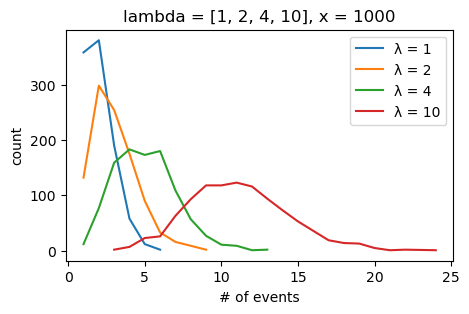

In [245]:
all_lambdas = [1, 2, 4, 10]
legend_values = []
sample_size = 1000

plt.figure(figsize=(5,3))
plt.title(label='lambda = '+str(all_lambdas)
                 +', x = '+str(sample_size))
    
for l in all_lambdas:
    legend_values.append('λ = '+str(l))
    rv_outputs = generate_poisson_rv(l, x=sample_size)

    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))

    plt.plot(values, counts)
    
plt.legend(legend_values, loc ="upper right")     
plt.xlabel('# of events')
plt.ylabel('count')
plt.show()

## Exponential distribution

- Statistical meaning: The probability of *x* time unit elapsed between events, given the event has a Poisson rate *lambda*, that is the event occurs *lambda* times on average within a time period.

- Real-life examples: 
    - Earthquake: the amount of time from now until an earthquake occurs
    - Airport: the amount of time passengers arriving at the the security point

- Graphs: (Y axis is basically lambda, the area below the curve is the probability)
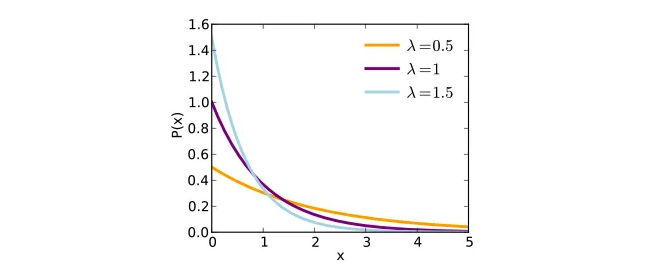

In [249]:
# generate x exponential random variate between two consecutive events

def generate_exponential_rv(l, x):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        cdf = 0
        time_unit = 0
        
        while prn > cdf:
            cdf = 1-math.e**(-l*time_unit)
            time_unit += 1
        
        # offset 1 that is added in the last round
        time_unit -= 1
        
        outputs.append(time_unit)    
        
    return outputs

In [267]:
def draw_exponential_rv(l, x):
    rv_outputs = generate_exponential_rv(l, x)
    
    plt.figure(figsize=(5,3))
    plt.title(label='lambda = '+str(l)+', x = '+str(x))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    plt.bar(x=values, height=counts)
    plt.xlabel('# of time unit elapsed between events')
    plt.ylabel('count')
    
    return rv_outputs

In [268]:
exponential_lambda = 1

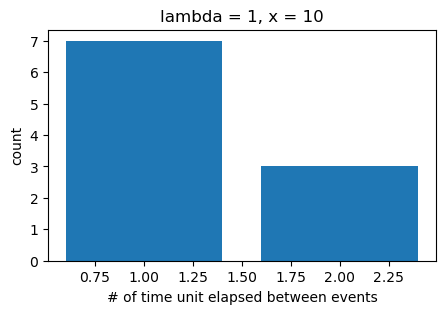

In [273]:
# small sample size
exponential_size = 10

exponential_rv_outputs = draw_exponential_rv(l=exponential_lambda, 
                                             x=exponential_size)

In [274]:
print(exponential_rv_outputs)

[2, 1, 1, 1, 1, 2, 1, 1, 1, 2]


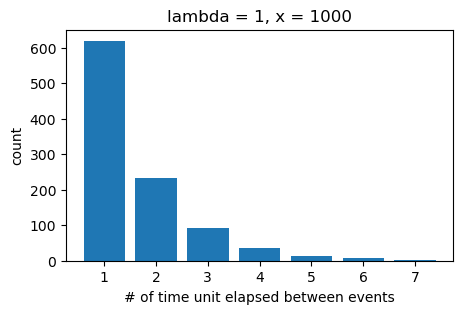

In [271]:
# big sample size
exponential_size = 1000

exponential_rv_outputs = draw_exponential_rv(l=exponential_lambda, 
                                             x=exponential_size)

In [272]:
print(exponential_rv_outputs)

[1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 5, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 4, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 2, 3, 1, 1, 6, 1, 1, 1, 1, 4, 2, 2, 2, 1, 4, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 5, 1, 5, 2, 2, 1, 4, 2, 1, 2, 1, 4, 3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 7, 1, 1, 1, 1, 2, 1, 2, 1, 6, 4, 1, 3, 2, 1, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 4, 2, 1, 1, 4, 1, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 2, 2, 1, 2, 2, 2, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 5, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 6, 2, 1, 1, 1, 5, 3, 1, 1, 1, 3, 1, 5, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 2, 1, 3, 1, 2, 6, 1, 1, 1, 1, 2, 1, 

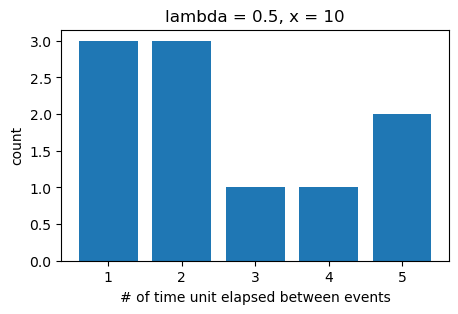

In [275]:
exponential_lambda = 0.5
exponential_size = 10
d = draw_exponential_rv(l=exponential_lambda, x=exponential_size)

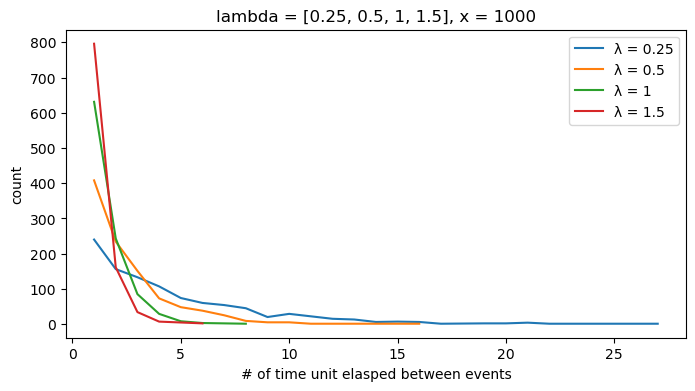

In [281]:
all_lambdas = [0.25, 0.5, 1, 1.5]
legend_values = []
sample_size = 1000

plt.figure(figsize=(8,4))
plt.title(label='lambda = '+str(all_lambdas)
                 +', x = '+str(sample_size))
    
for l in all_lambdas:
    legend_values.append('λ = '+str(l))
    rv_outputs = generate_exponential_rv(l, 
                                         x=sample_size)

    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))

    plt.plot(values, counts)
    
plt.legend(legend_values, loc ="upper right")     
plt.xlabel('# of time unit elasped between events')
plt.ylabel('count')
plt.show()

## Weibull distribution

- Statistical meaning: A generalization of Exponential Distribution, which is the probability of *x* time unit elapsed between events, given the event has a Poisson rate *lambda*. *k* in Weibull distribution: < 1 meaning failure decreases with time; > 1 meaning failure increases with time; = 1 meaning failure constant with time, that is Exponential distribution.

- Real-life examples: 
    - Defect products: the amount of times until the first defective unit; the amount of times between failure events
    - Web use: The amount of time a user spends on a web page (a.k.a between websites)

- Graphs: 
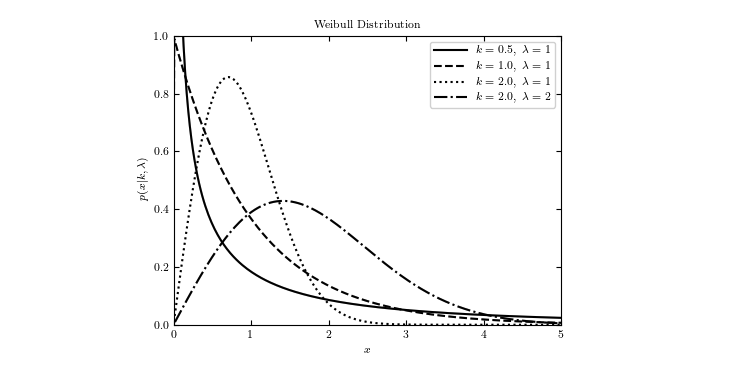

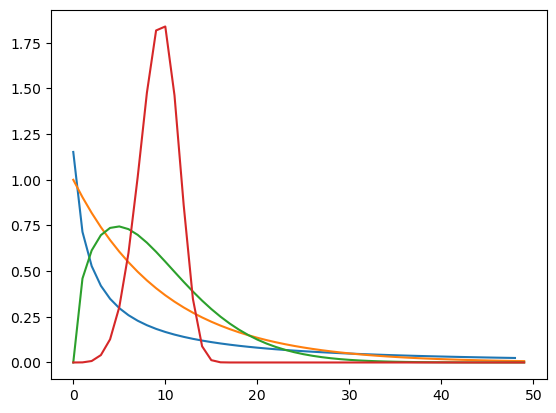

In [793]:
# probability density function

l = 1
ks = [0.5, 1, 1.5, 5]

for k in ks:
    outputs = []
    for x in range(50):
        if k < 1 and x == 0:
            continue
        x = x/10
        y = (k/l)*(x/l)**(k-1)*math.e**-(x/l)**k
        outputs.append(y)
    plt.plot(outputs)



In [284]:
# generate x weibull random variate between two consecutive events

def generate_weibull_rv(l, x, k):
    outputs = []
    
    for i in range(x):
        prn = generate_prn()
        
        logged_num = (-math.log(prn, 2))**1/k
        
        X = 1/l * logged_num
        
        outputs.append(X)    
        
    return outputs

In [345]:
def draw_weibull_rv(l, x, k):
    rv_outputs = generate_weibull_rv(l, x, k)
    
    plt.figure(figsize=(5, 3))
    plt.title(label='lambda = '+str(l)+'; k = '+str(k)
                    +'; x = '+str(x))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    max_rv = math.ceil(max(rv_outputs))
    min_rv = 0
    plt.hist(rv_outputs, bins=np.arange(max_rv+1), rwidth=0.8)
    plt.xlabel('# of time unit elasped between events')
    plt.ylabel('count')
    
    if max_rv > 15:
        plt.xticks([i for i in range(1, max_rv+1, 2)])
    else:
        plt.xticks([i for i in range(1, max_rv+1, 1)])
    
    return rv_outputs

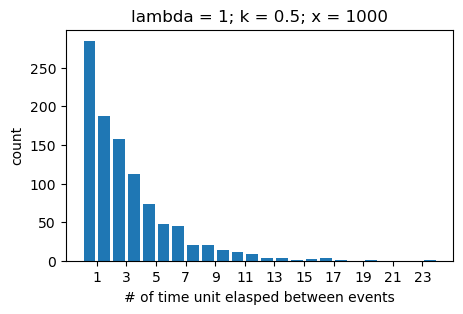

In [346]:
weibull_lambda = 1
weibull_k = 0.5
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [347]:
for i in range(15):
    print(weibull_rv_outputs[i])

0.2242879085786229
0.22198259664814857
0.9176185497861726
1.9200017666054354
4.371354837210938
3.0875978792101257
1.8084406324859885
7.023399955797401
1.130553465456722
1.5308750205349397
3.140725302855407
0.7950228735290986
0.7376795345287663
4.284714503350902
3.201920038073097


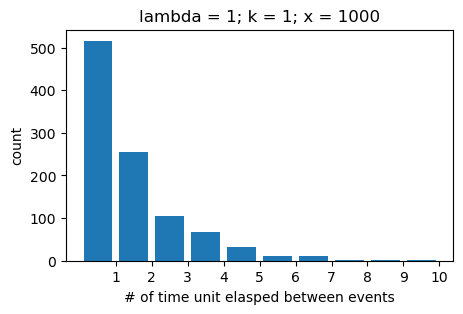

In [348]:
weibull_lambda = 1
weibull_k = 1
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [349]:
for i in range(15):
    print(weibull_rv_outputs[i])

0.7164679041775696
0.13111501326273567
3.3225412132232375
1.1139164957680139
6.629577738558458
0.005792216381656251
0.2559085400045857
1.6640165000451257
2.1585859268336343
0.005120382341796931
0.7976588588189952
1.086889657945854
0.31640456074078976
1.2243367171743276
3.1384468748546706


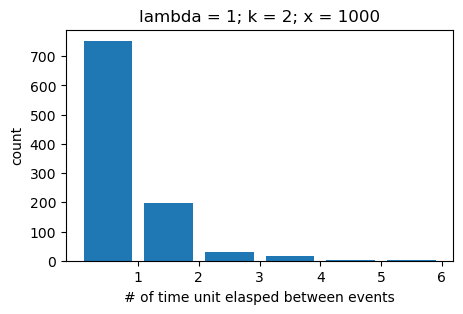

In [350]:
weibull_lambda = 1
weibull_k = 2
weibull_size = 1000

weibull_rv_outputs = draw_weibull_rv(l=weibull_lambda, 
                                     x=weibull_size, 
                                     k=weibull_k)

In [351]:
for i in range(15):
    print(weibull_rv_outputs[i])

1.2037464450739281
0.41249978083977895
0.6983936478735885
1.0013621676897013
0.14866773518727014
0.06287253634407856
0.7991609975069589
3.1059521095640443
0.06821323726715683
0.6478161683399518
0.8228264954121809
1.5668011544918248
0.5591510691891283
1.4930703179518363
0.3861339570321504


## Normal distribution

- Statistical meaning: A continuous probability distribution with mean and variance, and the data is symmetrically distributed with no skew

- Real-life examples: 
    - Heights
    - SAT scores
    - Restaurant Reviews

- Graphs: 
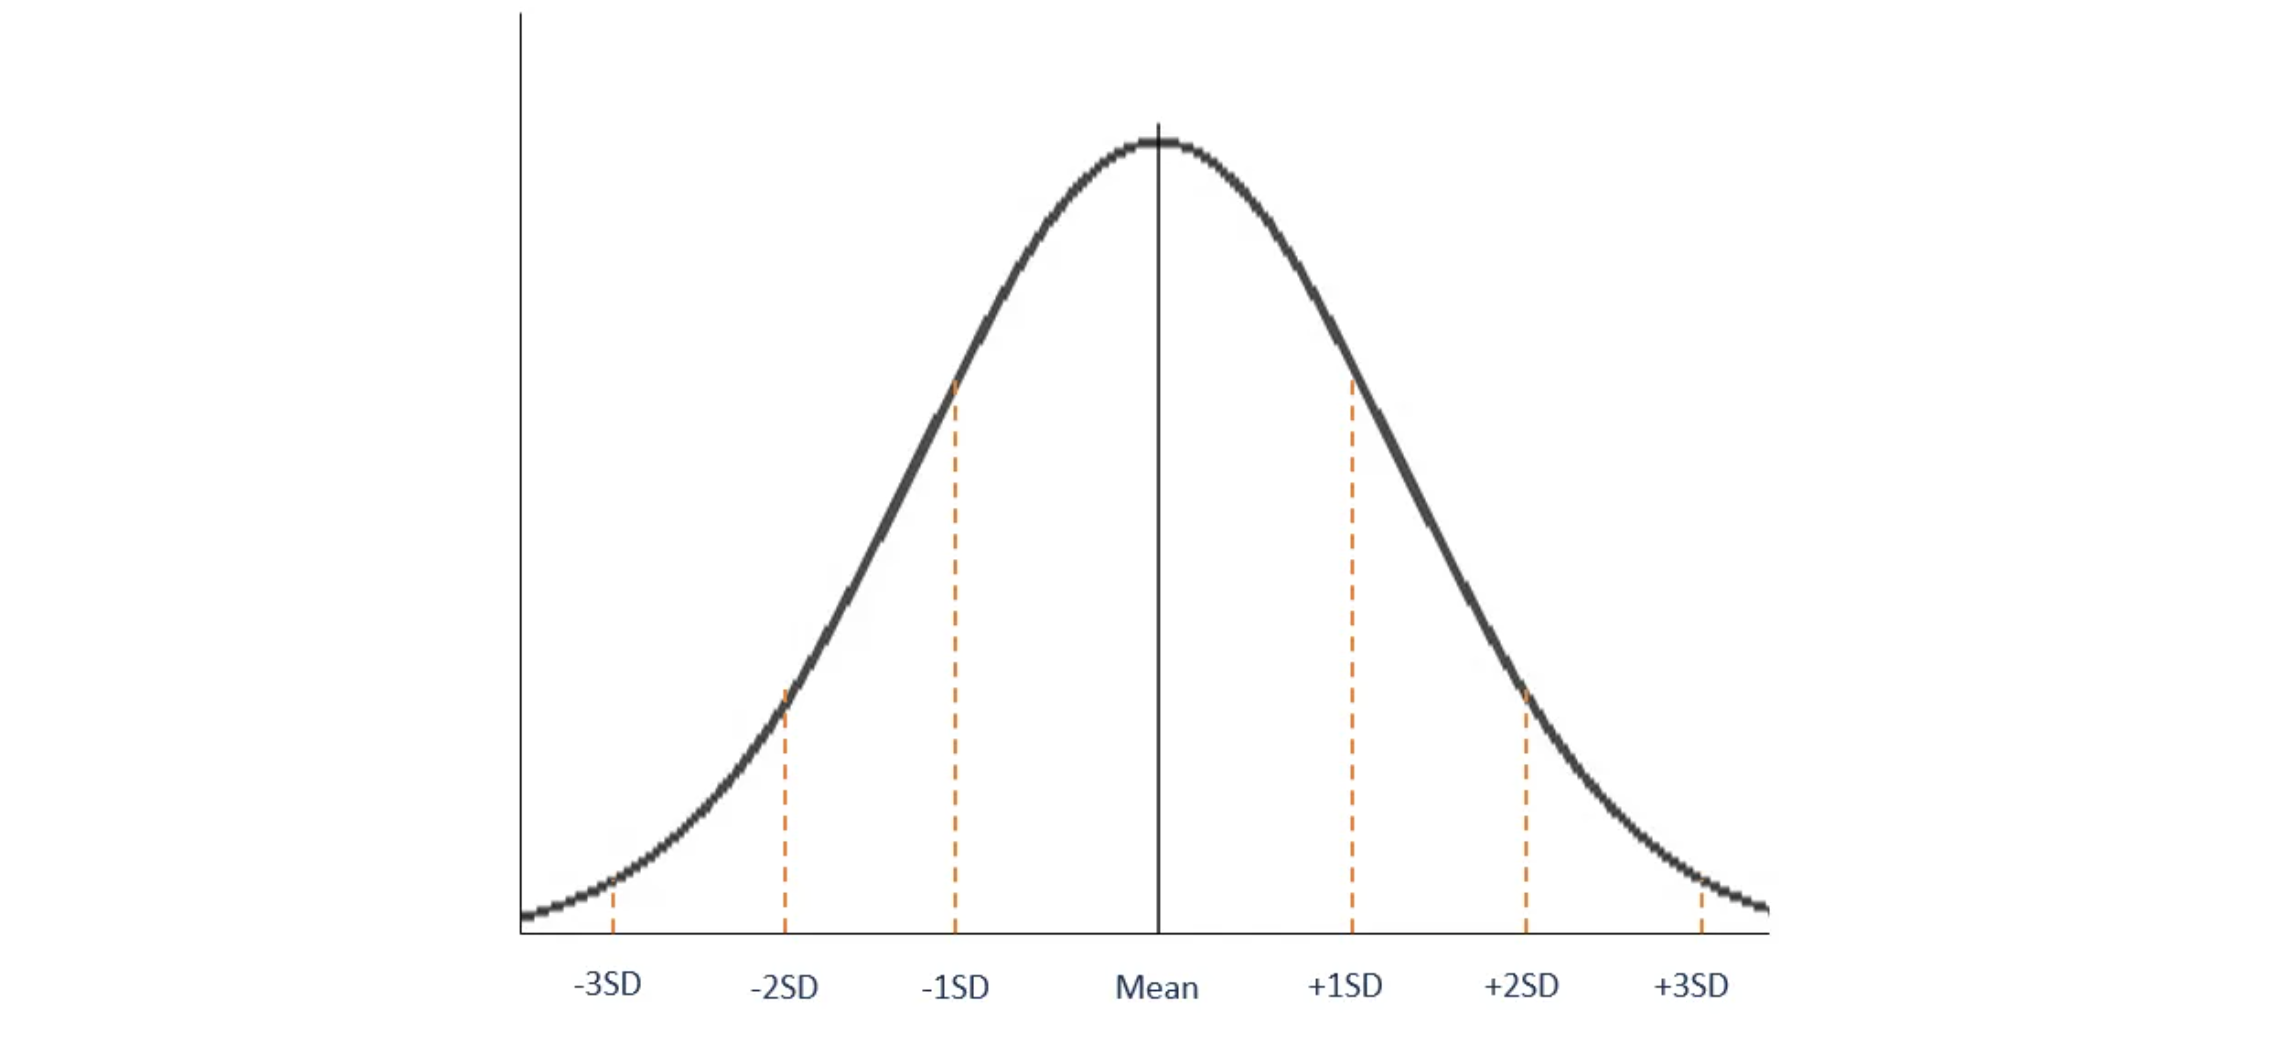

In [352]:
# generate x normal random variate with mean and variance

def generate_normal_nv(mu, variance, x):
    outputs = []
    
    for i in range(x):
        U = generate_prn()
        Z = (U**0.135-(1-U)**0.135)/0.1975
        X = mu + math.sqrt(variance)*Z
        outputs.append(X)

    return outputs

In [409]:
def draw_normal_rv(mu, variance, x):
    rv_outputs = generate_normal_nv(mu, variance, x)
    
    plt.figure(figsize=(5, 3))
    plt.title(label='mu = '+str(mu)+';variance = '+str(variance))
    
    values = []
    counts = []
    for i in set(rv_outputs):
        values.append(i)
        counts.append(rv_outputs.count(i))
    
    min_rv = math.floor(min(rv_outputs))
    max_rv = math.ceil(max(rv_outputs))
    
    plt.hist(rv_outputs, bins=max_rv-min_rv, rwidth=0.8)
    plt.xlabel('x')
    plt.ylabel('count')
    
    return rv_outputs

In [410]:
normal_mu = 3
normal_variance = 16

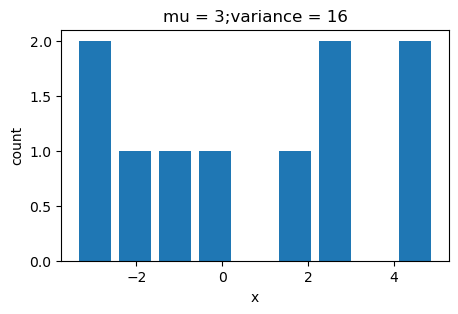

In [411]:
# small sample size
normal_size = 10

normal_rv_outputs = draw_normal_rv(mu=normal_mu, 
                                   variance=normal_variance
                                   , x=normal_size)

In [412]:
for i in range(10):
    print(normal_rv_outputs[i])

-1.2659304173685095
2.00239970269625
4.7083090906339145
2.4838919463187024
2.369557781186304
-0.45861675091230314
-2.9464129280101625
4.960764480650361
-3.4320536909484654
-2.395714186858255


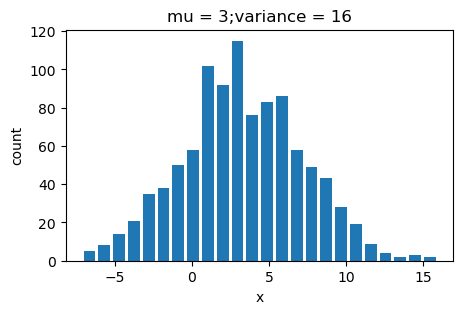

In [414]:
# big sample size
normal_size = 1000

normal_rv_outputs = draw_normal_rv(mu=normal_mu, 
                                   variance=normal_variance, 
                                   x=normal_size)

In [415]:
for i in range(10):
    print(normal_rv_outputs[i])

4.244577089326956
3.3367218085128174
3.3627867337006743
2.9255379863266184
0.35118279497325755
0.5368937271228074
10.351242469739862
0.6398890338029548
2.1123537771620358
2.6810519258270964


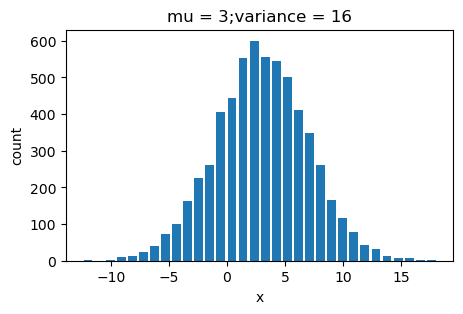

In [423]:
# large sample size
normal_size = 6000

normal_rv_outputs = draw_normal_rv(mu=normal_mu, 
                                   variance=normal_variance, 
                                   x=normal_size)

In [424]:
for i in range(10):
    print(normal_rv_outputs[i])

0.8567140171642382
4.042920293547592
2.4549741836867964
0.30356445104982965
2.1401140512894803
-3.7329840741149454
1.8760930961919318
4.495683604480363
-2.8682784873508878
3.4646087217034522
